In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPool1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
# df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
# df = df.drop(['Unnamed: 4'], axis=1)
df.columns = ['labels', 'data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#spam -> 1, ham ->0
df['b_labels'] = df['labels'].map({'ham':0, 'spam':1})
Y = df['b_labels'].values
Y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [8]:
X_train,X_test, Y_train, Y_test = train_test_split(df['data'], Y, test_size=0.33)

In [9]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)


In [10]:
word2vec = tokenizer.word_index
V = len(word2vec)

In [11]:
print("Total {} uniue tokens:".format(V))

Total 7215 uniue tokens:


In [12]:
#padding(pre, post?) with pad_sequences()
data_train = pad_sequences(sequences_train)
print("sequences_train.shape: ", data_train.shape)



sequences_train.shape:  (3733, 189)


In [13]:
T = data_train.shape[1]

In [14]:
T

189

In [15]:
data_test = pad_sequences(sequences_test, maxlen=T)
print("sequences_test.shape: ", data_test.shape)

sequences_test.shape:  (1839, 189)


In [16]:
data_test = pad_sequences(sequences_test, maxlen=T)
print("sequences_test.shape: ", data_test.shape)

sequences_test.shape:  (1839, 189)


In [38]:
#create model
#input -> lstm -> dense (sigmoid)

D = 20 #window size 
M = 15 #hidden state (node)



i = Input(shape=(T,))
x = Embedding(V+1, D)(i) #0->1
x = LSTM(M, return_sequences=True)(x) # return_sequences=True : sequence 작업을 하겠다 
x = GlobalMaxPool1D()(x)

x = Dn
model = Model(i,x)
model.summary()



Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 189)]             0         
_________________________________________________________________
embedding_13 (Embedding)     (None, 189, 20)           144320    
_________________________________________________________________
lstm_13 (LSTM)               (None, 189, 15)           2160      
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 15)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 16        
Total params: 146,496
Trainable params: 146,496
Non-trainable params: 0
_________________________________________________________________


In [41]:
V

7215

In [43]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
r = model.fit(data_train,Y_train, epochs=10, validation_data=(data_test,Y_test))

Train on 3733 samples, validate on 1839 samples
Epoch 1/10
3733/3733 [==============================] - 16s 4ms/sample - loss: 0.0288 - accuracy: 0.9957 - val_loss: 0.0810 - val_accuracy: 0.9772
Epoch 2/10
3733/3733 [==============================] - 11s 3ms/sample - loss: 0.0219 - accuracy: 0.9962 - val_loss: 0.0793 - val_accuracy: 0.9766
Epoch 3/10
3733/3733 [==============================] - 10s 3ms/sample - loss: 0.0175 - accuracy: 0.9968 - val_loss: 0.0786 - val_accuracy: 0.9755
Epoch 4/10
3733/3733 [==============================] - 11s 3ms/sample - loss: 0.0143 - accuracy: 0.9979 - val_loss: 0.0839 - val_accuracy: 0.9772
Epoch 5/10
3733/3733 [==============================] - 11s 3ms/sample - loss: 0.0125 - accuracy: 0.9981 - val_loss: 0.0831 - val_accuracy: 0.9766
Epoch 6/10
3733/3733 [==============================] - 10s 3ms/sample - loss: 0.0112 - accuracy: 0.9981 - val_loss: 0.0886 - val_accuracy: 0.9761
Epoch 7/10
3733/3733 [==============================] - 11s 3ms/sample

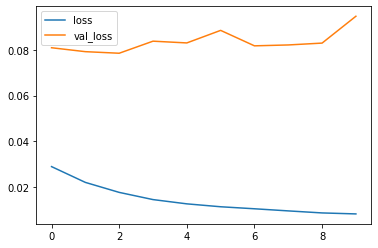

In [47]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [81]:
temp_i = Input(shape=(5,))
temp_x = Embedding(10,3)(temp_i) #embedding(v,d) d는 차수 !!!!!!!!!!!!!!!

# 임베딩 개수는 인풋 쉐입 개수보다 커야한다 !!!!!!!!!!!!!!!!!!!!!!!!

temp_model = Model(temp_i, temp_x)
temp_model.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        [(None, 5)]               0         
_________________________________________________________________
embedding_23 (Embedding)     (None, 5, 3)              30        
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [82]:
input_array = np.random.randint(5, size=(1,5))
input_array


array([[0, 3, 3, 3, 3]])

In [83]:
temp_model.compile(loss='mse',optimizer='adam')

In [84]:
output_array= temp_model.predict(input_array)
output_array

array([[[ 0.03643223, -0.04610434, -0.02676529],
        [-0.00619571,  0.02668506,  0.00829341],
        [-0.00619571,  0.02668506,  0.00829341],
        [-0.00619571,  0.02668506,  0.00829341],
        [-0.00619571,  0.02668506,  0.00829341]]], dtype=float32)